# Projeto de KNN

## Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obtendo os dados

In [4]:
df = pd.read_csv(r"C:\Users\herna\OneDrive\Python-Data-Science-and-Machine-Learning-Bootcamp\5. Machine Learning\K-Nearest-Neighbors\KNN_Project_Data")

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


## Análise exploratória dos dados

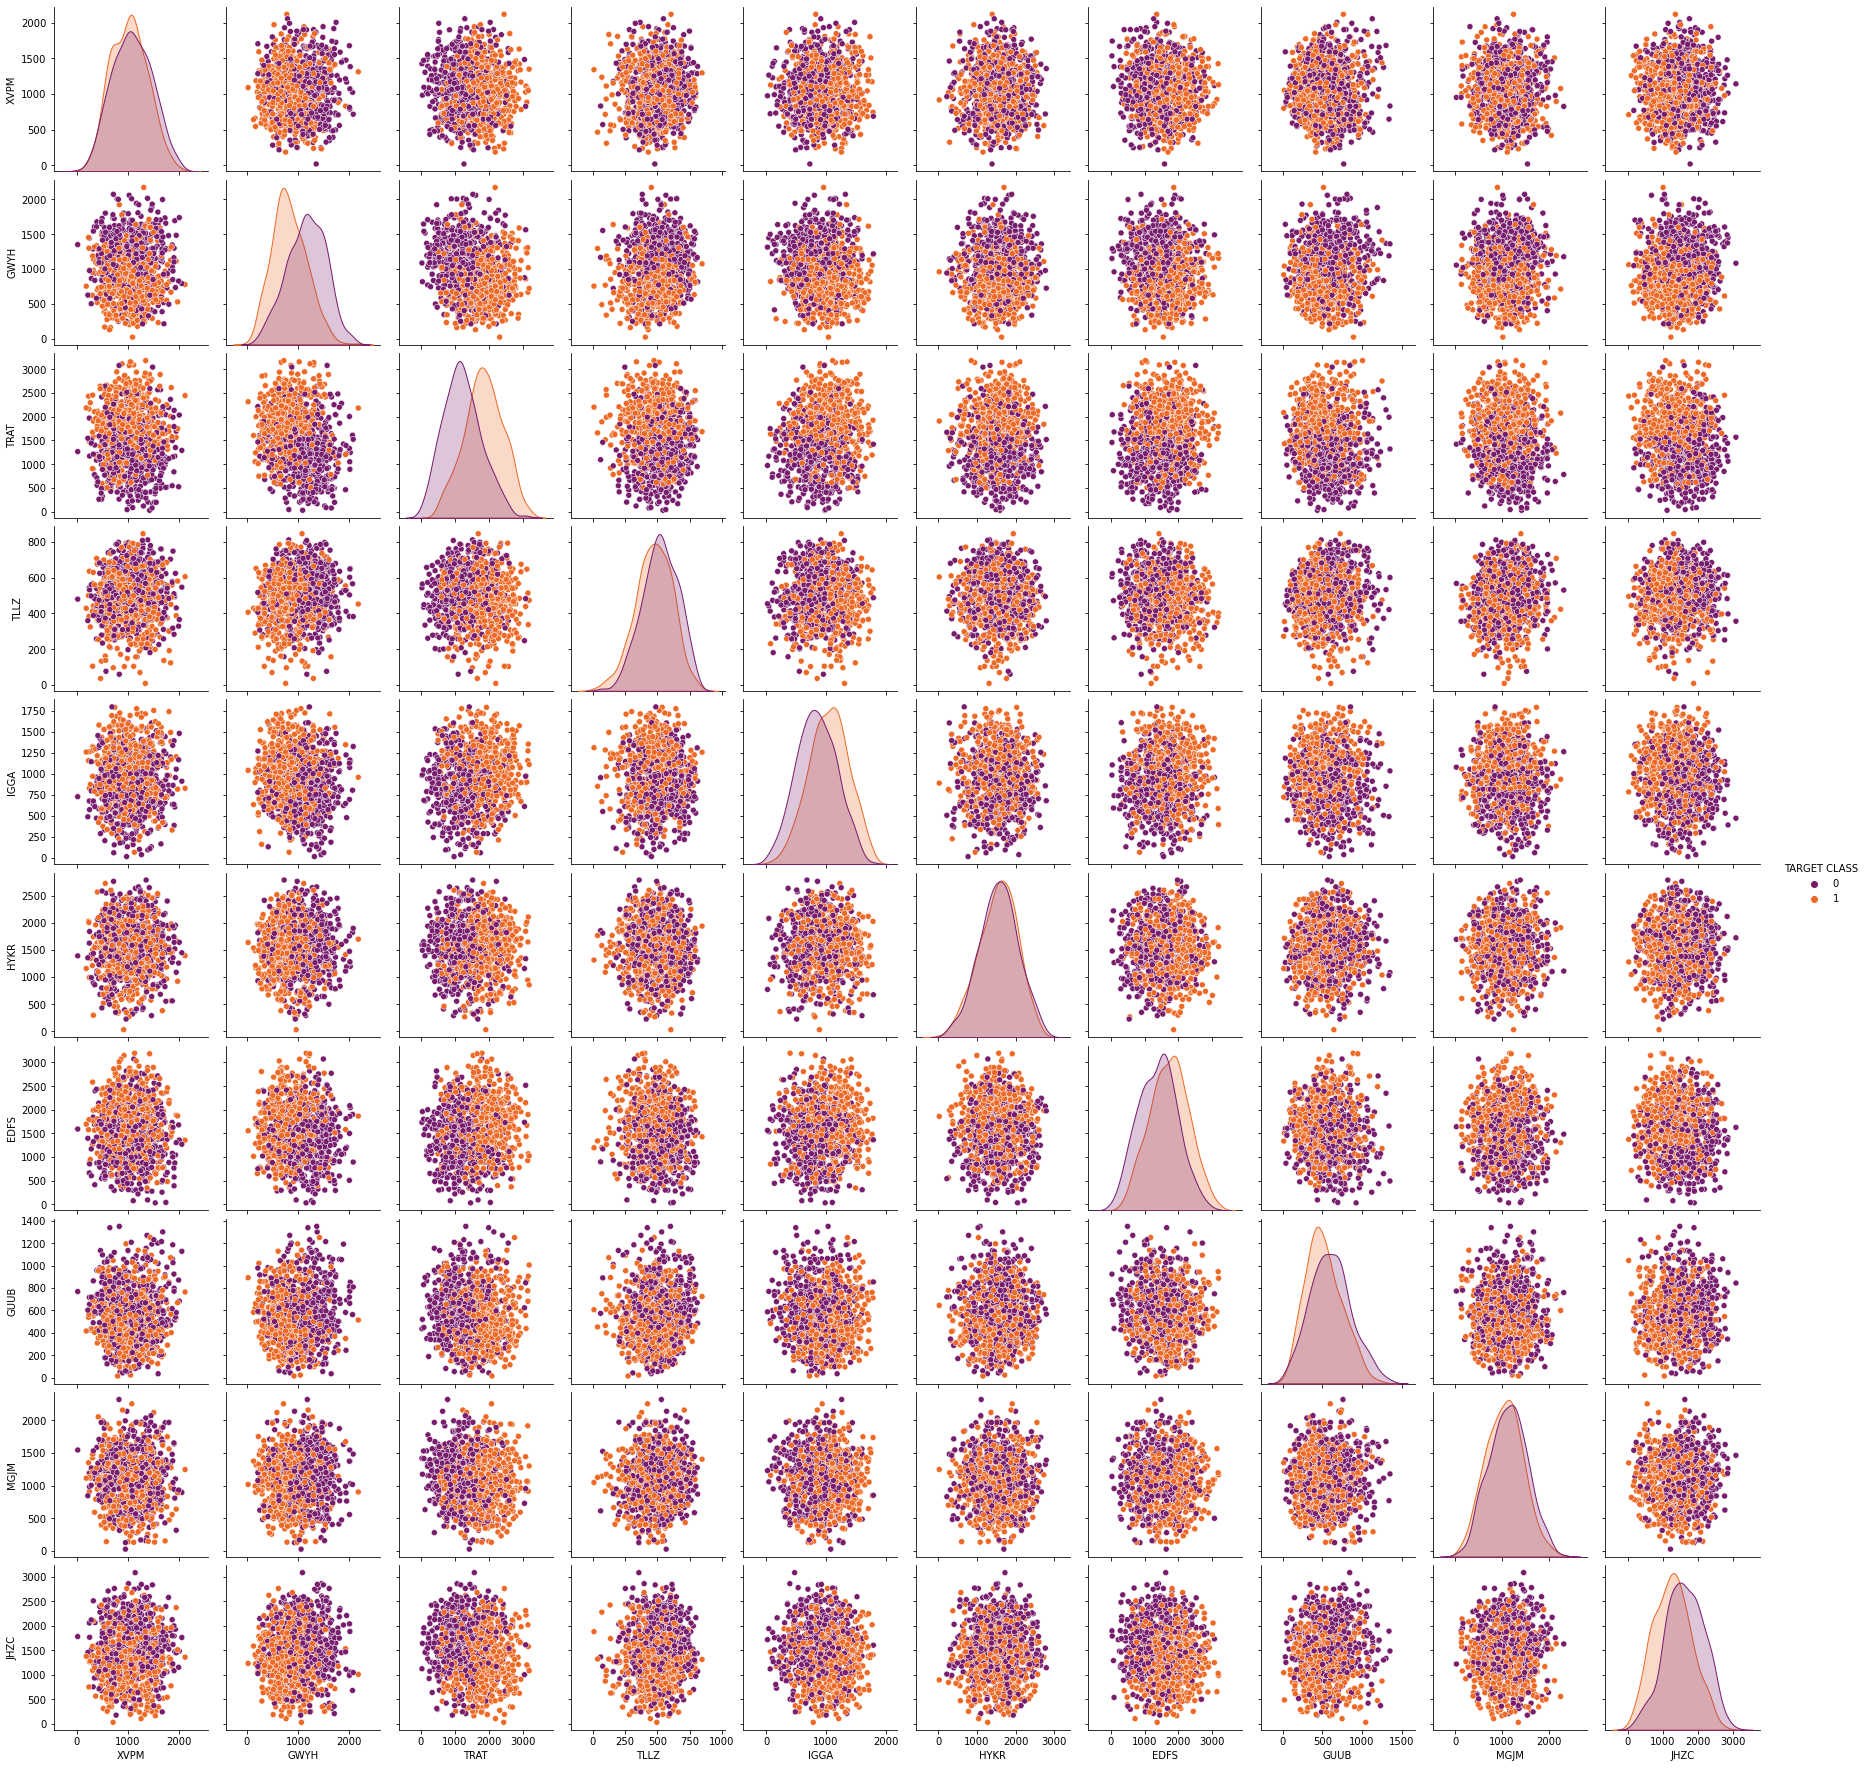

In [8]:
sns.pairplot(df, hue='TARGET CLASS', palette='inferno')

## Padronizando as variáveis

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [12]:
parametros_padronizados = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [13]:
parametros_padronizados

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [15]:
df_param = pd.DataFrame(parametros_padronizados, columns=df.columns[:-1])

In [16]:
df_param.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Divisão treino-teste

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_param,df['TARGET CLASS'], test_size=0.3)

## Utilizando o KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Previsões e avaliações

In [23]:
pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(confusion_matrix(y_test, pred))

[[118  36]
 [ 38 108]]


In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       154
           1       0.75      0.74      0.74       146

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



## Escolhendo o valor K

In [32]:
taxa_erro = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    taxa_erro.append(np.mean(pred!=y_test))

In [33]:
taxa_erro

[0.24666666666666667,
 0.23666666666666666,
 0.20333333333333334,
 0.21,
 0.17333333333333334,
 0.18333333333333332,
 0.18,
 0.19666666666666666,
 0.18666666666666668,
 0.19,
 0.19,
 0.2,
 0.2,
 0.2,
 0.19333333333333333,
 0.18333333333333332,
 0.17666666666666667,
 0.17666666666666667,
 0.18,
 0.19,
 0.2,
 0.18666666666666668,
 0.18666666666666668,
 0.17666666666666667,
 0.18333333333333332,
 0.18,
 0.17666666666666667,
 0.18,
 0.18,
 0.17666666666666667,
 0.17666666666666667,
 0.18,
 0.17333333333333334,
 0.17666666666666667,
 0.18666666666666668,
 0.18,
 0.18333333333333332,
 0.17333333333333334,
 0.17333333333333334]

Text(0.5, 1.0, 'Taxa de erro vs Valor K')

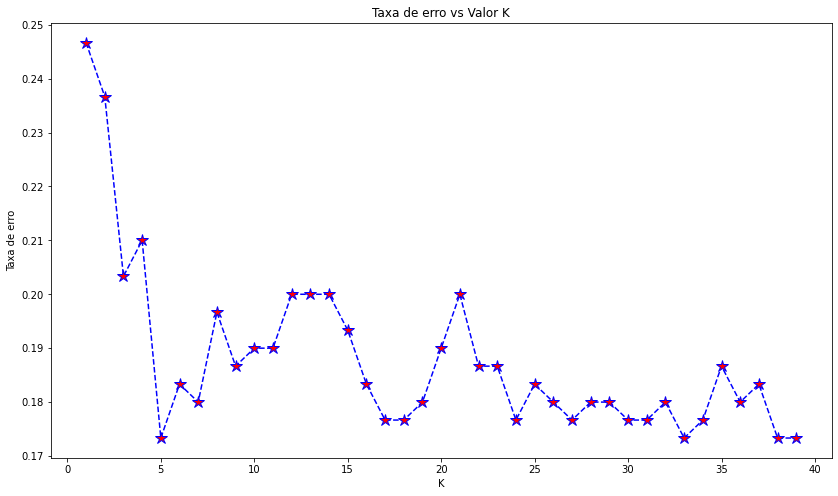

In [37]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40), taxa_erro, color='blue', linestyle='dashed', marker='*', markersize=12, markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Taxa de erro')
plt.title('Taxa de erro vs Valor K')

## Treinando o modelo com um novo valor de K
#### O novo valor utilizado será 39, pois ele possui uma baixa taxa de erro

In [39]:
knn = KNeighborsClassifier(n_neighbors = 39)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
taxa_erro.append(np.mean(pred!=y_test))

print(confusion_matrix(y_test, pred))

print('\n')

print(classification_report(y_test, pred))


[[123  31]
 [ 21 125]]


              precision    recall  f1-score   support

           0       0.85      0.80      0.83       154
           1       0.80      0.86      0.83       146

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

